In [298]:
import numpy as np
%matplotlib widget

In [299]:
def oneHotEncode(column, uniqueValues):
    oneHotEncodedColumn = np.zeros((len(column), len(uniqueValues)))
    for i in range(len(column)):
        oneHotEncodedColumn[i][list(uniqueValues).index(column[i])] = 1
    return oneHotEncodedColumn.astype(int)

In [300]:
def printRepartion(column, uniqueValues, message = ""):
    print(f"--- Values repartition {message} ---")
    for i in range(len(uniqueValues)):
        nb = len(column[column == uniqueValues[i]])
        print(uniqueValues[i], ":", len(column[column == uniqueValues[i]]), "(", round(nb / len(column) * 100, 1), "%)")
    print("\n")

In [301]:
def plotRepartition(column, uniqueValues):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 5))
    plt.bar(uniqueValues, [len(column[column == uniqueValues[i]]) for i in range(len(uniqueValues))])
    plt.show()

In [302]:
#Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice

#==> we keep the following columns: + means we one hot encode it, = means we keep it as is
#MSSubClass +, MSZoning =, LotFrontage =, Stree +, Alley +, LotShape +,
#LandContour +, Utilities +, LotConfig +, LandSlope +, Neighborhood +,
#Condition1 +, Condition2 +, BldgType +, HouseStyle +, OverallQual =,
#OverallCond =, // YearBuilt // =, // YearRemodAdd // =, RoofStyle +, RoofMatl +, 
#Exterior1st +, Exterior2nd +, MasVnrType +, MasVnrArea =, ExterQual +,
#ExterCond +, Foundation +, BsmtQual +, BsmtCond +, BsmtExposure +,
#BsmtFinType1 +, BsmtFinSF1 =, BsmtFinType2 +, BsmtFinSF2 =, BsmtUnfSF =,
#TotalBsmtSF =, Heating +, HeatingQC +, CentralAir +, Electrical +,
#1stFlrSF =, 2ndFlrSF =, LowQualFinSF =, GrLivArea =, BsmtFullBath =,
#BsmtHalfBath =, FullBath =, HalfBath =, Bedroom =, Kitchen =, // KitchenQual //,
#TotRmsAbvGrd =, // Functional // +, Fireplaces =, // FireplaceQu // +, 
#GarageType +, // GarageYrBlt // =, // GarageFinish + //, GarageCars =, 
#GarageArea =, // GarageQual // +, // GarageCond // +, // PavedDrive // +,
#WoodDeckSF =, OpenPorchSF =, EnclosedPorch =, 3SsnPorch =, ScreenPorch =,
#PoolArea =, // PoolQC // +, // Fence // +, ?? MiscFeature ?? +, ?? MiscVal ?? =,
#// MoSold //=, // YrSold // =, SaleType +, SaleCondition +

In [303]:
with open("train.csv") as f:
    lines = f.readlines()

header = lines[0].split(",") #header
lines = lines[1:]

data = np.array([line.split(",") for line in lines])

#increase print size
np.set_printoptions(threshold=np.inf)

print(header)
print(data.shape)



['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

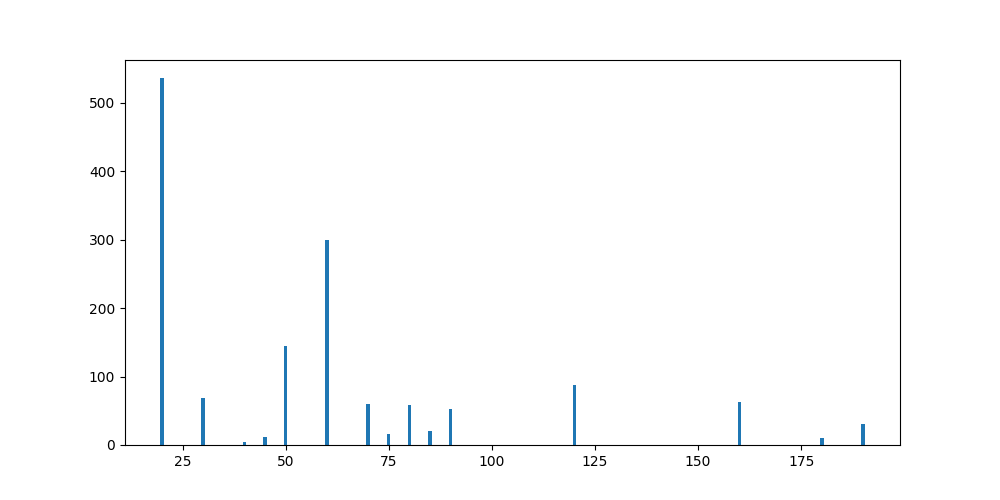

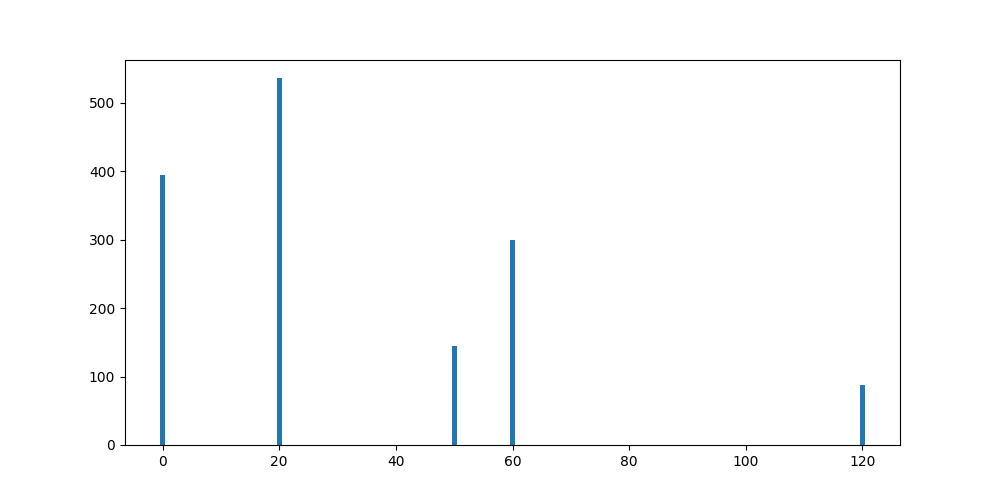

In [304]:
#MSSubClass
MSSubClass = data[:, 1].copy().astype(int)
uniqueMSSubClass = np.array((20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 150, 160, 180, 190))
# printRepartion(MSSubClass, uniqueMSSubClass)
plotRepartition(MSSubClass, uniqueMSSubClass)

#we only keep the 4 most common values
MSSubClass = np.array([MSSubClass[i] if MSSubClass[i] in (20, 60, 50, 120) else 0 for i in range(len(MSSubClass))])
uniqueMSSubClass = np.array((0, 20, 60, 50, 120))
plotRepartition(MSSubClass, uniqueMSSubClass)

oneHotEncodedMSSubClass = oneHotEncode(MSSubClass, uniqueMSSubClass)

--- Values repartition  ---
A : 0 ( 0.0 %)
C (all) : 10 ( 0.7 %)
FV : 65 ( 4.5 %)
I : 0 ( 0.0 %)
RH : 16 ( 1.1 %)
RL : 1151 ( 78.8 %)
RP : 0 ( 0.0 %)
RM : 218 ( 14.9 %)


--- Values repartition  ---
other : 91 ( 6.2 %)
RL : 1151 ( 78.8 %)
RM : 218 ( 14.9 %)




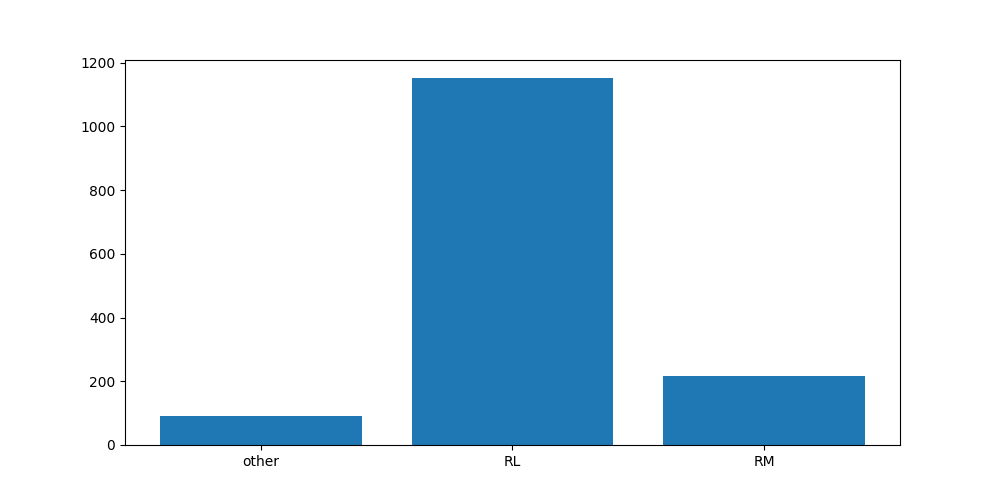

[[0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]]


In [305]:
#MSZoning
MSZoning = data[:,2].copy()
uniqueMSZoning = np.array(["A", "C (all)", "FV", "I", "RH", "RL", "RP", "RM"])
printRepartion(MSZoning, uniqueMSZoning)

#we keep RL, RM, and others are grouped in "other"
MSZoning[MSZoning == "A"] = "other"
MSZoning[MSZoning == "C (all)"] = "other"
MSZoning[MSZoning == "FV"] = "other"
MSZoning[MSZoning == "I"] = "other"
MSZoning[MSZoning == "RH"] = "other"
MSZoning[MSZoning == "RP"] = "other"
uniqueMSZoning = np.array(["other", "RL", "RM"])

printRepartion(MSZoning, uniqueMSZoning)
plotRepartition(MSZoning, uniqueMSZoning)

oneHotEncodedMSZoning = oneHotEncode(MSZoning, uniqueMSZoning)
print(oneHotEncodedMSZoning[:10])

In [306]:
#LotFrontage
LotFrontage = data[:,3].copy()
LotFrontage[LotFrontage == "NA"] = np.nan
LotFrontage = LotFrontage.astype(float)
print(LotFrontage[:20])

[65. 80. 68. 60. 84. 85. 75. nan 51. 50. 70. 85. nan 91. nan 51. nan 72.
 66. 70.]


In [307]:
#LotArea
LotArea = data[:,4].copy().astype(float)
print(LotArea[:20])

[ 8450.  9600. 11250.  9550. 14260. 14115. 10084. 10382.  6120.  7420.
 11200. 11924. 12968. 10652. 10920.  6120. 11241. 10791. 13695.  7560.]


--- Values repartition  ---
Grvl : 6 ( 0.4 %)
Pave : 1454 ( 99.6 %)




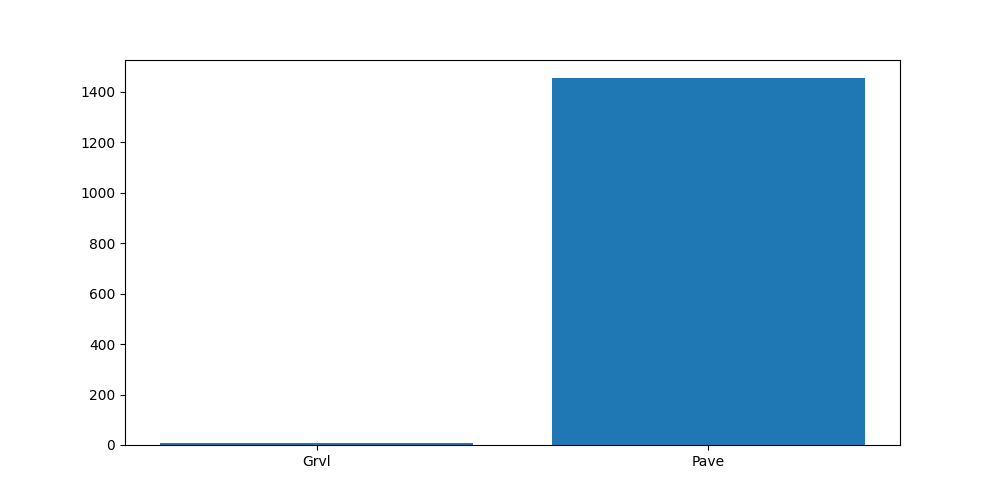

In [308]:
#TO IGNORE : Grvl is ultra rare

#Street
Street = data[:,5].copy()
uniqueStreet = np.array(["Grvl", "Pave"])

printRepartion(Street, uniqueStreet)
plotRepartition(Street, uniqueStreet)

# oneHotEncodedStreet = oneHotEncode(Street, uniqueStreet)
# print(oneHotEncodedStreet[:10]) #1 0 is rare

In [309]:
#Alley
Alley = data[:,6].copy()
uniqueAlley = np.array(["Grvl", "Pave", "NA"])

printRepartion(Alley, uniqueAlley)

#We keep only NA and other
Alley[Alley == "Grvl"] = "other"
Alley[Alley == "Pave"] = "other"
uniqueAlley = np.array(["NA", "other"])

printRepartion(Alley, uniqueAlley, "after cleaning")

oneHotEncodedAlley = oneHotEncode(Alley, uniqueAlley)
print(oneHotEncodedAlley[:10]) #almost all NA

--- Values repartition  ---
Grvl : 50 ( 3.4 %)
Pave : 41 ( 2.8 %)
NA : 1369 ( 93.8 %)


--- Values repartition after cleaning ---
NA : 1369 ( 93.8 %)
other : 91 ( 6.2 %)


[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]]


In [310]:
#LotShape
LotShape = data[:,7].copy()
lotshape_mapping = {"Reg": 0, "IR1": 1, "IR2": 2, "IR3": 3}

printRepartion(LotShape, list(lotshape_mapping.keys()))

#We only keep Reg and others are grouped in "other"
LotShape[LotShape == "IR1"] = "other"
LotShape[LotShape == "IR2"] = "other"
LotShape[LotShape == "IR3"] = "other"
lotshape_mapping = {"Reg": 0, "other": 1}

printRepartion(LotShape, list(lotshape_mapping.keys()), "after cleaning")

LotShape = np.array([lotshape_mapping[shape] for shape in LotShape])
print(data[:20, 7])
print(LotShape[:20])

--- Values repartition  ---
Reg : 925 ( 63.4 %)
IR1 : 484 ( 33.2 %)
IR2 : 41 ( 2.8 %)
IR3 : 10 ( 0.7 %)


--- Values repartition after cleaning ---
Reg : 925 ( 63.4 %)
other : 535 ( 36.6 %)


['Reg' 'Reg' 'IR1' 'IR1' 'IR1' 'IR1' 'Reg' 'IR1' 'Reg' 'Reg' 'Reg' 'IR1'
 'IR2' 'IR1' 'IR1' 'Reg' 'IR1' 'Reg' 'Reg' 'Reg']
[0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0]


In [311]:
#LandContour
LandContour = data[:,8].copy()
landcontour_mapping = {"Lvl": 0, "Bnk": 1, "HLS": 2, "Low": 3}

printRepartion(LandContour, list(landcontour_mapping.keys()))

#We only keep Lvl and others are grouped in "other"
LandContour[LandContour != "Lvl"] = "other"
landcontour_mapping = {"Lvl": 0, "other": 1}
printRepartion(LandContour, list(landcontour_mapping.keys()), "after cleaning")

LandContour = np.array([landcontour_mapping[contour] for contour in LandContour])
print(data[:10, 8])
print(LandContour[:100])

--- Values repartition  ---
Lvl : 1311 ( 89.8 %)
Bnk : 63 ( 4.3 %)
HLS : 50 ( 3.4 %)
Low : 36 ( 2.5 %)


--- Values repartition after cleaning ---
Lvl : 1311 ( 89.8 %)
other : 149 ( 10.2 %)


['Lvl' 'Lvl' 'Lvl' 'Lvl' 'Lvl' 'Lvl' 'Lvl' 'Lvl' 'Lvl' 'Lvl']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0]


In [314]:
#TO IGNORE : AllPub is ultra majoritary

#Utilities
Utilities = data[:,9].copy()
utilities_mapping = {"AllPub": 0, "NoSewr": 1, "NoSeWa": 2, "ELO": 3}

printRepartion(Utilities, list(utilities_mapping.keys()))

# Utilities = np.array([utilities_mapping[utility] for utility in Utilities])
# print(data[:10, 9])
# print(Utilities[:10])

--- Values repartition  ---
AllPub : 1459 ( 99.9 %)
NoSewr : 0 ( 0.0 %)
NoSeWa : 1 ( 0.1 %)
ELO : 0 ( 0.0 %)




--- Values repartition  ---
Inside : 1052 ( 72.1 %)
Corner : 263 ( 18.0 %)
CulDSac : 94 ( 6.4 %)
FR2 : 47 ( 3.2 %)
FR3 : 4 ( 0.3 %)




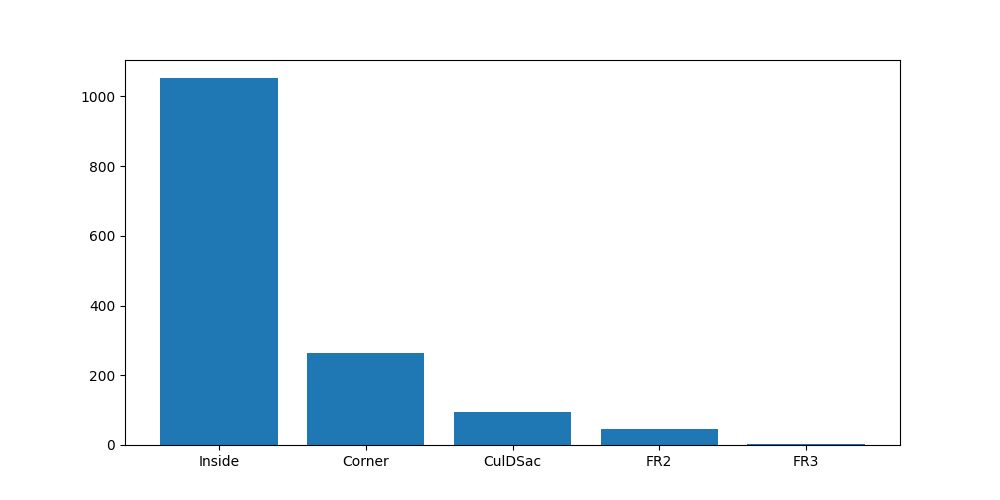

--- Values repartition  ---
Inside : 1052 ( 72.1 %)
Corner : 263 ( 18.0 %)
CulDSac : 94 ( 6.4 %)
other : 51 ( 3.5 %)




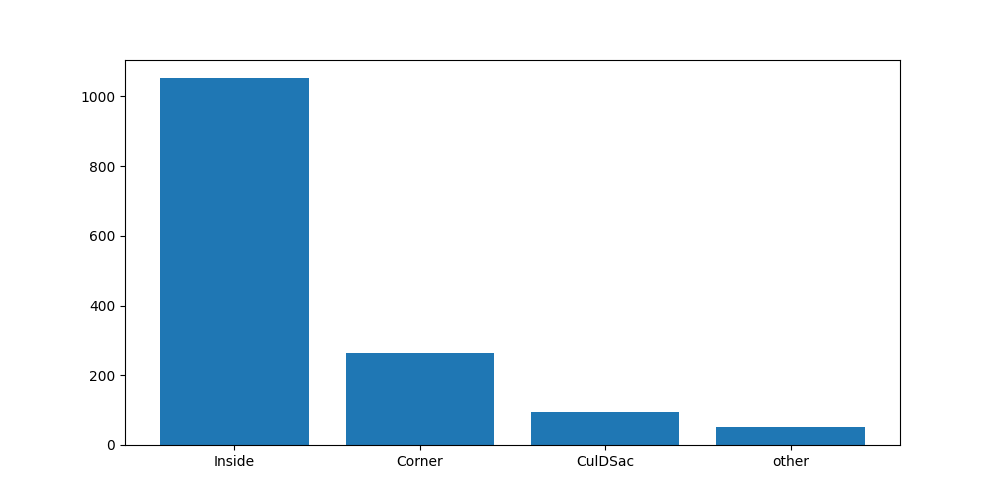

[[1 0 0 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [1 0 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [1 0 0 0]
 [0 1 0 0]]


In [313]:
#TO DECIDE : we keep it or not ?

#LotConfig
LotConfig = data[:,10].copy()
uniqueLotConfig = np.array(["Inside", "Corner", "CulDSac", "FR2", "FR3"])

printRepartion(LotConfig, uniqueLotConfig)
plotRepartition(LotConfig, uniqueLotConfig)

#we only keep the 4 most common values$
LotConfig[LotConfig == "FR2"] = "other"
LotConfig[LotConfig == "FR3"] = "other"
uniqueLotConfig = np.array(["Inside", "Corner", "CulDSac", "other"])

printRepartion(LotConfig, uniqueLotConfig)
plotRepartition(LotConfig, uniqueLotConfig)

oneHotEncodedLotConfig = oneHotEncode(LotConfig, uniqueLotConfig)
print(oneHotEncodedLotConfig[:10])


In [317]:
#TO IGNORE : Sev is ultra rare and Mod is rare

#LandSlope
LandSlope = data[:,11].copy()
landslope_mapping = {"Gtl": 0, "Mod": 1, "Sev": 2}

printRepartion(LandSlope, list(landslope_mapping.keys()))

#We only keep Gtl and others are grouped in "other"
LandSlope[LandSlope != "Gtl"] = "other"
landslope_mapping = {"Gtl": 0, "other": 1}

printRepartion(LandSlope, list(landslope_mapping.keys()), "after cleaning")

# LandSlope = np.array([landslope_mapping[slope] for slope in LandSlope])
# print(data[:100, 11])
# print(LandSlope[:100])

--- Values repartition  ---
Gtl : 1382 ( 94.7 %)
Mod : 65 ( 4.5 %)
Sev : 13 ( 0.9 %)


--- Values repartition after cleaning ---
Gtl : 1382 ( 94.7 %)
other : 78 ( 5.3 %)




In [ ]:
#Neighborhood
Neighborhood = data[:,12]
uniqueNeighborhood = np.array(["Blmngtn", "Blueste", "BrDale", "BrkSide", "ClearCr", 
                               "CollgCr", "Crawfor", "Edwards", "Gilbert", "IDOTRR", 
                               "MeadowV", "Mitchel", "NAmes", "NoRidge", "NPkVill", 
                               "NridgHt", "NWAmes", "OldTown", "SWISU", "Sawyer", 
                               "SawyerW", "Somerst", "StoneBr", "Timber", "Veenker"])
oneHotEncodedNeighborhood = oneHotEncode(Neighborhood, uniqueNeighborhood)
print(oneHotEncodedNeighborhood[:10])


[[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [ ]:
#Condition1
Condition1 = data[:,13]
uniqueCondition1 = np.array(["Artery", "Feedr", "Norm", "RRNn",
                             "RRAn", "PosN", "PosA", "RRNe", "RRAe"])
oneHotEncodedCondition1 = oneHotEncode(Condition1, uniqueCondition1)
# print(oneHotEncodedCondition1[:10])

#Condition2
Condition2 = data[:,14]
uniqueCondition2 = np.array(["Artery", "Feedr", "Norm", "RRNn",
                             "RRAn", "PosN", "PosA", "RRNe", "RRAe"])
oneHotEncodedCondition2 = oneHotEncode(Condition2, uniqueCondition2)

#union of condition1 and condition2
oneHotEncodedCondition = np.logical_or(oneHotEncodedCondition1, oneHotEncodedCondition2).astype(int)

print('\n', oneHotEncodedCondition[:10]) #can have multiple active conditions



 [[0 0 1 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 0 0]
 [1 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]]


In [ ]:
#BldgType
BldgType = data[:,15]
uniqueBldgType = np.array(["1Fam", "2fmCon", "Duplex", "TwnhsE", "Twnhs"])
oneHotEncodedBldgType = oneHotEncode(BldgType, uniqueBldgType)
print(oneHotEncodedBldgType[:10])


[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]]


In [ ]:
#HouseStyle
HouseStyle = data[:,16]
uniqueHouseStyle = np.array(["1Story", "1.5Fin", "1.5Unf", "2Story", "2.5Fin", "2.5Unf", "SFoyer", "SLvl"])
oneHotEncodedHouseStyle = oneHotEncode(HouseStyle, uniqueHouseStyle)
print(oneHotEncodedHouseStyle[:10])

[[0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]]


In [ ]:
#OverallQual
OverallQual = data[:,17].astype(int)
print(OverallQual[:10])

#OverallCond
OverallCond = data[:,18].astype(int)
print(OverallCond[:10])


[7 6 7 7 8 5 8 7 7 5]
[5 8 5 5 5 5 5 6 5 6]


In [ ]:
#Get sold year
YearSold = data[:,77].astype(int)
print(YearSold[:10])

[2008 2007 2008 2006 2008 2009 2007 2009 2008 2008]


In [ ]:
#YearBuilt
YearBuilt = data[:,19].astype(int)
print(YearBuilt[:10])

delta_YearSold_YearBuilt = YearSold - YearBuilt
print(delta_YearSold_YearBuilt[:10])

[2003 1976 2001 1915 2000 1993 2004 1973 1931 1939]
[ 5 31  7 91  8 16  3 36 77 69]


In [ ]:
#YearRemodAdd
YearRemodAdd = data[:,20].astype(int)

delta_YearSold_YearRemodAdd = YearSold - YearRemodAdd
print(delta_YearSold_YearRemodAdd[:10])

[ 5 31  6 36  8 14  2 36 58 58]


In [ ]:
#RoofStyle
RoofStyle = data[:,21]
uniqueRoofStyle = np.array(["Flat", "Gable", "Gambrel", "Hip", "Mansard", "Shed"])
oneHotEncodedRoofStyle = oneHotEncode(RoofStyle, uniqueRoofStyle)
print(oneHotEncodedRoofStyle[:10])

[[0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]]


In [ ]:
#RoofMatl
RoofMatl = data[:,22]
uniqueRoofMatl = np.array(["ClyTile", "CompShg", "Membran", "Metal", "Roll", "Tar&Grv", "WdShake", "WdShngl"])
oneHotEncodedRoofMatl = oneHotEncode(RoofMatl, uniqueRoofMatl)
print(oneHotEncodedRoofMatl[:10])

[[0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]]


In [ ]:
#Exterior1st
Exterior1st = data[:,23]
Exterior1st[Exterior1st == "Wd Shng"] = "WdShing"
Exterior1st[Exterior1st == "Brk Cmn"] = "BrkComm"
Exterior1st[Exterior1st == "CmentBd"] = "CemntBd"

uniqueExterior = np.array(["AsbShng", "AsphShn", "BrkComm", "BrkFace", "CBlock", 
                              "CemntBd", "HdBoard", "ImStucc", "MetalSd", "Other", 
                              "Plywood", "PreCast", "Stone", "Stucco", "VinylSd", 
                              "Wd Sdng", "WdShing"])
oneHotEncodedExterior1st = oneHotEncode(Exterior1st, uniqueExterior)

#Exterior2nd
Exterior2nd = data[:,24]
Exterior2nd[Exterior2nd == "Wd Shng"] = "WdShing"
Exterior2nd[Exterior2nd == "Brk Cmn"] = "BrkComm"
Exterior2nd[Exterior2nd == "CmentBd"] = "CemntBd"
oneHotEncodedExterior2nd = oneHotEncode(Exterior2nd, uniqueExterior)

#union of exterior1st and exterior2nd
oneHotEncodedExterior = np.logical_or(oneHotEncodedExterior1st, oneHotEncodedExterior2nd).astype(int)
print(oneHotEncodedExterior[:10])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]]


In [ ]:
#MasVnrType
MasVnrType = data[:,25]
MasVnrType[MasVnrType == "None"] = "NA"
uniqueMasVnrType = np.array(["BrkCmn", "BrkFace", "CBlock", "NA", "Stone"])
oneHotEncodedMasVnrType = oneHotEncode(MasVnrType, uniqueMasVnrType)
print(oneHotEncodedMasVnrType[:10])

[[0 1 0 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 0 1 0]]


In [ ]:
#MasVnrArea
MasVnrArea = data[:,26]
MasVnrArea[MasVnrArea == "NA"] = np.nan
MasVnrArea = MasVnrArea.astype(float)
print(MasVnrArea[:100])

[ 196.    0.  162.    0.  350.    0.  186.  240.    0.    0.    0.  286.
    0.  306.  212.    0.  180.    0.    0.    0.  380.    0.  281.    0.
    0.  640.    0.  200.    0.    0.    0.    0.    0.    0.  246.  132.
    0.  650.    0.    0.  101.    0.    0.    0.    0.  412.    0.    0.
    0.    0.    0.    0.    0.    0.    0.  272.  456.    0. 1031.    0.
    0.    0.  178.    0.  573.  344.  287.  167.    0.    0. 1115.    0.
   40.  104.    0.    0.    0.    0.    0.    0.  576.  443.  468.   66.
   22.  284.    0.   76.    0.    0.    0.  203.    0.    0.    0.   68.
  183.   48.    0.    0.]


In [ ]:
#ExterQual
ExterQual = data[:,27]
exterqual_mapping = {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4}
ExterQual = np.array([exterqual_mapping[qual] for qual in ExterQual])
print(data[:10, 27])
print(ExterQual[:10])

['Gd' 'TA' 'Gd' 'TA' 'Gd' 'TA' 'Gd' 'TA' 'TA' 'TA']
[1 2 1 2 1 2 1 2 2 2]


In [ ]:
#ExterCond
ExterCond = data[:,28]
extercond_mapping = {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4}
ExterCond = np.array([extercond_mapping[cond] for cond in ExterCond])
print(data[:10, 28])
print(ExterCond[:10])

['TA' 'TA' 'TA' 'TA' 'TA' 'TA' 'TA' 'TA' 'TA' 'TA']
[2 2 2 2 2 2 2 2 2 2]


In [ ]:
#Foundation
Foundation = data[:,29]
uniqueFoundation = np.array(["BrkTil", "CBlock", "PConc", "Slab", "Stone", "Wood"])
oneHotEncodedFoundation = oneHotEncode(Foundation, uniqueFoundation)
print(oneHotEncodedFoundation[:10])


[[0 0 1 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [1 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 1]
 [0 0 1 0 0 0]
 [0 1 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]]


In [ ]:
#BsmtQual
BsmtQual = data[:,30]
BsmtQual_mapping = {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4, "NA": 5}
BsmtQual = np.array([BsmtQual_mapping[qual] for qual in BsmtQual])
print(data[:10, 30])
print(BsmtQual[:10])

['Gd' 'Gd' 'Gd' 'TA' 'Gd' 'Gd' 'Ex' 'Gd' 'TA' 'TA']
[1 1 1 2 1 1 0 1 2 2]


In [ ]:
#BsmtCond
BsmtCond = data[:,31]
BsmtCond_mapping = {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4, "NA": 5}
BsmtCond = np.array([BsmtCond_mapping[cond] for cond in BsmtCond])
print(data[:10, 31])
print(BsmtCond[:10])

['TA' 'TA' 'TA' 'Gd' 'TA' 'TA' 'TA' 'TA' 'TA' 'TA']
[2 2 2 1 2 2 2 2 2 2]


In [ ]:
#BsmtExposure
BsmtExposure = data[:,32]
BsmtExposure_mapping = {"Gd": 0, "Av": 1, "Mn": 2, "No": 3, "NA": 4}
BsmtExposure = np.array([BsmtExposure_mapping[exposure] for exposure in BsmtExposure])
print(data[:10, 32])
print(BsmtExposure[:10])

['No' 'Gd' 'Mn' 'No' 'Av' 'No' 'Av' 'Mn' 'No' 'No']
[3 0 2 3 1 3 1 2 3 3]


In [ ]:
#BsmtFinType1
BsmtFinType1 = data[:,33]
BsmtFinType1_mapping = {"GLQ": 0, "ALQ": 1, "BLQ": 2, "Rec": 3, "LwQ": 4, "Unf": 5, "NA": 6}
BsmtFinType1 = np.array([BsmtFinType1_mapping[finType] for finType in BsmtFinType1])
print(data[:10, 33])
print(BsmtFinType1[:10])

['GLQ' 'ALQ' 'GLQ' 'ALQ' 'GLQ' 'GLQ' 'GLQ' 'ALQ' 'Unf' 'GLQ']
[0 1 0 1 0 0 0 1 5 0]


In [ ]:
#BsmtFinSF1
BsmtFinSF1 = data[:,34].astype(float)
print(BsmtFinSF1[:10])

[ 706.  978.  486.  216.  655.  732. 1369.  859.    0.  851.]


In [ ]:
#BsmtFinType2
BsmtFinType2 = data[:,35]
BsmtFinType2_mapping = {"GLQ": 0, "ALQ": 1, "BLQ": 2, "Rec": 3, "LwQ": 4, "Unf": 5, "NA": 6}
printRepartion(BsmtFinType2, list(BsmtFinType2_mapping.keys()))

BsmtFinType2_mapping = {"GLQ": 0, "ALQ": 0, "BLQ": 0, "Rec": 0, "LwQ": 0, "Unf": 1, "NA": 0}
BsmtFinType2 = np.array([BsmtFinType2_mapping[finType] for finType in BsmtFinType2])

printRepartion(BsmtFinType2, list(BsmtFinType2_mapping.values()))

--- Répartition des valeurs ---
GLQ : 14 ( 1.0 %)
ALQ : 19 ( 1.3 %)
BLQ : 33 ( 2.3 %)
Rec : 54 ( 3.7 %)
LwQ : 46 ( 3.2 %)
Unf : 1256 ( 86.0 %)
NA : 38 ( 2.6 %)


--- Répartition des valeurs ---
0 : 204 ( 14.0 %)
0 : 204 ( 14.0 %)
0 : 204 ( 14.0 %)
0 : 204 ( 14.0 %)
0 : 204 ( 14.0 %)
1 : 1256 ( 86.0 %)
0 : 204 ( 14.0 %)




In [ ]:
#BsmtFinSF2
BsmtFinSF2 = data[:,36].astype(float)
print(BsmtFinSF2[:10])

[ 0.  0.  0.  0.  0.  0.  0. 32.  0.  0.]


In [ ]:
#BsmtUnfSF
BsmtUnfSF = data[:,37].astype(float)
print(BsmtUnfSF[:10])

[150. 284. 434. 540. 490.  64. 317. 216. 952. 140.]


In [ ]:
#TotalBsmtSF
TotalBsmtSF = data[:,38].astype(float)
print(TotalBsmtSF[:10])

[ 856. 1262.  920.  756. 1145.  796. 1686. 1107.  952.  991.]


In [ ]:
#PROBLEM : GasA is ultra majoritary and everything else is ultra minority
#Solution : Not consider this feature

#Heating
Heating = data[:,39]
uniqueHeating = np.array(["Floor", "GasA", "GasW", "Grav", "OthW", "Wall"])

printRepartion(Heating, uniqueHeating)

# oneHotEncodedHeating = oneHotEncode(Heating, uniqueHeating)
# print(oneHotEncodedHeating[:10])
# print(Heating[Heating == "Wall"])


--- Répartition des valeurs ---
Floor : 1 ( 0.1 %)
GasA : 1428 ( 97.8 %)
GasW : 18 ( 1.2 %)
Grav : 7 ( 0.5 %)
OthW : 2 ( 0.1 %)
Wall : 4 ( 0.3 %)




In [ ]:
#HeatingQC
HeatingQC = data[:,40]
heatingqc_mapping = {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 3} #group Po with Fa because of low number of Po and Fa
HeatingQC = np.array([heatingqc_mapping[qual] for qual in HeatingQC])

#print reparition of HeatingQC
print("HeatingQC repartition")
print("Ex: ", len(HeatingQC[HeatingQC == 0]))
print("Gd: ", len(HeatingQC[HeatingQC == 1]))
print("TA: ", len(HeatingQC[HeatingQC == 2]))
print("Fa + Po: ", len(HeatingQC[HeatingQC == 3]))

print(data[:10, 40])
print(HeatingQC[:10])

HeatingQC repartition
Ex:  741
Gd:  241
TA:  428
Fa + Po:  50
['Ex' 'Ex' 'Ex' 'Gd' 'Ex' 'Ex' 'Ex' 'Ex' 'Gd' 'Ex']
[0 0 0 1 0 0 0 0 1 0]
